In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(url)
print(df.info())
print(df.head())
myexcel = pd.read_csv(url)
print(myexcel.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB
None
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celt

In [15]:
#PREPROCESSING
myexcel.columns = myexcel.columns.str.strip()

In [27]:
df['height'] = np.random.randint(150, 181, size=len(df))

#1
distribution = df[column_name].value_counts()
percentage = (distribution / len(df)) * 100
team_distribution = pd.DataFrame({'Count': distribution, 'Percentage': percentage})

print(team_distribution)

                        Count  Percentage
Team                                     
New Orleans Pelicans       19    4.148472
Memphis Grizzlies          18    3.930131
Utah Jazz                  16    3.493450
Milwaukee Bucks            16    3.493450
New York Knicks            16    3.493450
Boston Celtics             15    3.275109
Los Angeles Clippers       15    3.275109
Los Angeles Lakers         15    3.275109
Phoenix Suns               15    3.275109
Sacramento Kings           15    3.275109
Brooklyn Nets              15    3.275109
Philadelphia 76ers         15    3.275109
Toronto Raptors            15    3.275109
Golden State Warriors      15    3.275109
Indiana Pacers             15    3.275109
Detroit Pistons            15    3.275109
Cleveland Cavaliers        15    3.275109
Chicago Bulls              15    3.275109
Houston Rockets            15    3.275109
San Antonio Spurs          15    3.275109
Atlanta Hawks              15    3.275109
Dallas Mavericks           15    3

In [32]:
#2
position_distribution = df[column_name].value_counts()
print(position_distribution)

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


In [44]:
#3
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['age_group'] = pd.cut(df[column_name], bins=age_bins, labels=age_labels, right=False)
age_distribution = df['age_group'].value_counts()
print(age_distribution)

age_group
26-35    272
18-25    154
36-45     32
46-55      0
56-65      0
Name: count, dtype: int64


In [47]:
salary_by_team = df.groupby('team')['salary'].sum().sort_values(ascending=False)
salary_by_position = df.groupby('position')['salary'].sum().sort_values(ascending=False)
print("Salary by Team:\n", salary_by_team)
print("Salary by Position:\n", salary_by_position)

Salary by Team:
 team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     5

In [49]:
#5  
correlation = df[['age', 'salary']].corr()
print(correlation)

             age    salary
age     1.000000  0.214009
salary  0.214009  1.000000


In [ ]:
#VISUALISATION

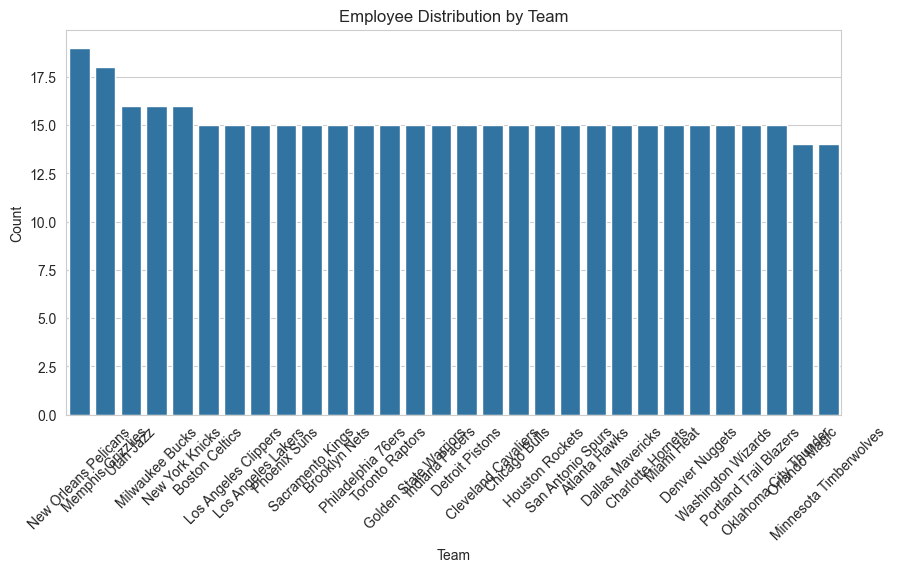

In [37]:
sns.set_style("whitegrid")

#BARCHART
plt.figure(figsize=(10,5))
sns.barplot(x=team_distribution.index, y=team_distribution['Count'])
plt.xticks(rotation=45)
plt.title("Employee Distribution by Team")
plt.show()


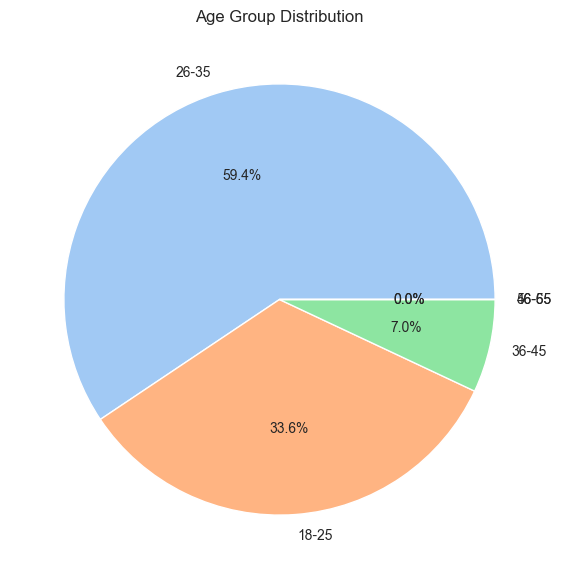

In [51]:
# pie chart
plt.figure(figsize=(7,7))
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Age Group Distribution")
plt.show()

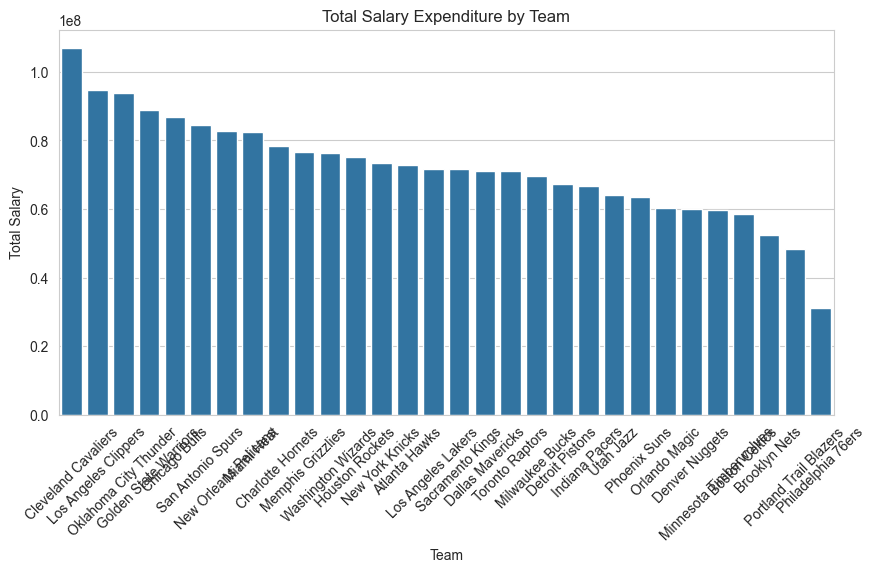

In [52]:
# Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=salary_by_team.index, y=salary_by_team.values)
plt.xticks(rotation=45)
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.show()

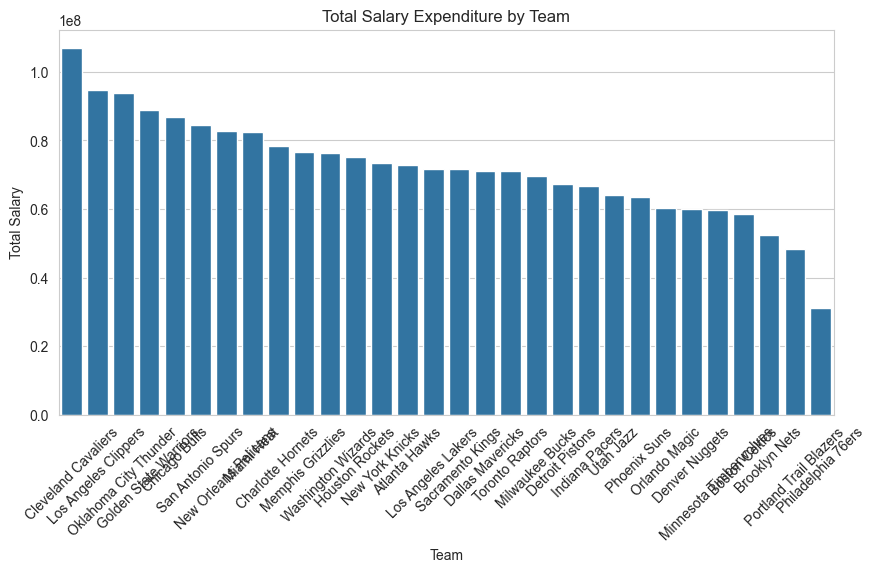

In [53]:
# Bar chart for salary expenditure by team

plt.figure(figsize=(10, 5))
sns.barplot(x=salary_by_team.index, y=salary_by_team.values)
plt.xticks(rotation=45)
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.show()

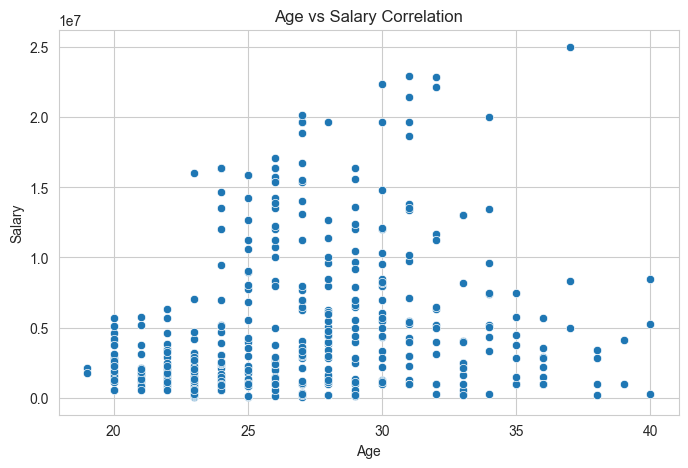

In [54]:
# Scatter plot for age vs salary correlation
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['salary'])
plt.title("Age vs Salary Correlation")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()